# **📘 TALENTO TECH - ENTREGA FINAL**

### **Informacion de Cursada:**
- **Curso:** Data Analytics con Python (25262)
- **Profesora:** Gisele Milagros Gonzalez
- **Alumno:** Cristian Daniel Romero

###**Datasets (en Drive):**
- `ventas.csv`
- `clientes.csv`
- `marketing.csv`

### **Hoja de Ruta (Chek List):**
🧩**ETAPA 1: Recopilación y Preparación de Datos**
1. Entorno y Carga de Datos.
2. Analisis Exploratorio de Datos (EDA) (Inicial).
3. Calidad de los Datos (Nulos y Duplicados).

🧹**ETAPA 2: Preprocesamiento y Limpieza de Datos**

4. Limpieza y Normalizacion de Datos (datasets).
5. Reporte Global luego de la limpieza de datos.
6. Transformación de Datos (Filtrar “Alto Rendimiento").
7. Agregacion (Resumen por Categoria y Analisis de Ingresos).
8. Integracion de Datos (Ventas y Marketing).

🔍**ETAPA 3: Análisis de Datos**

9. Estadística Descriptiva.  
10. Análisis Exploratorio de Datos (EDA) (Con visualizaciones).
11. Correlación.

📊**ETAPA 4: Visualización de Datos**

12. Visualización con Matplotlib.
13. Visualización Avanzada con Seaborn.
14. Presentación Final.


<br>----------------------------------------------------------------------------

## 🧩 **ETAPA 1:** Recopilación y Preparación de Datos
**Objetivos:**
- Demostrar habilidades en Python.
- Familiarizarse con el entorno de trabajo.
- Adquirir conocimientos básicos sobre manipulación de datos.

<br>----------------------------------------------------------------------------

### 1️⃣ **Entorno y Carga de Datos**

Cargar los datasets como DataFrames usando pandas.

Sugerencias:
- Utilizar pd.read_csv() para cargar los archivos CSV.
- Verificar la ruta correcta y revisar las primeras filas con .head().

<br>----------------------------------------------------------------------------

In [178]:
# Importo bibliotecas para el analisis de datos.

import pandas as pd   # Para uso de DataFrame.
import numpy as np    # Para uso de matrices, vectores y operaciones numericas.


In [179]:
# Monto la unidad.

from google.colab import drive    # Importo la API para trabajar con Google Colab (modulo "drive" de la biblioteca google.colab).
drive.mount('/content/drive')     # Monto mi Google Drive dentro del entorno de Colab en la carpeta.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Verifico y visualizo que los archivos csv se encuentren en la carpeta datasets.

import os   # Importo modulo "os".

print("="*80)
print(f"=== LISTADO DE DATASETS ===".center(80, "="))
print("="*80)
print("\n")

os.listdir("/content/drive/MyDrive/datasets")   # Mi datasets.



============================= LISTADO DE DATASETS ==============================




['clientes.csv',
 'marketing.csv',
 'ventas.xlsx',
 'ventas.csv',
 'clientes.xlsx',
 'marketing.xlsx',
 'ventas_clean.csv',
 'clientes_clean.csv',
 'marketing_clean.csv']

In [181]:
# Defino rutas relativas de los datasets para facil reemplazo por si se cambia la ubicacion.
# (En Google Colab, al subir archivos, se puede utilizar la carpeta /content o montar Drive)

print("="*80)
print(f"=== FORMAS Y PRIMERAS LINEAS DE DATASETS ===".center(80, "="))
print("="*80)

ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargo los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Valido formas para comprobar que se cargaron correctamente las tablas de datos ("nro_filas","nro_columnas").
print("\n\nTablas ('nro_filas','nro_columnas'):\n")
print("ventas.shape ----->", ventas.shape)
print("clientes.shape --->", clientes.shape)
print("marketing.shape -->", marketing.shape)

# Muestro las primeras filas de cada dataset para corroborar estructura de columnas.
print("\n\nPrimeras lineas de tabla 'ventas':\n")
display(ventas.head(3))
print("\n\nPrimeras lineas de tabla 'clientes':\n")
display(clientes.head(3))
print("\n\nPrimeras lineas de tabla 'marketing':\n")
display(marketing.head(3))
print("-"*80)
print("\n")


===================== FORMAS Y PRIMERAS LINEAS DE DATASETS =====================


Tablas ('nro_filas','nro_columnas'):

ventas.shape -----> (3035, 6)
clientes.shape ---> (567, 5)
marketing.shape --> (90, 6)


Primeras lineas de tabla 'ventas':



,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos




Primeras lineas de tabla 'clientes':



,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85




Primeras lineas de tabla 'marketing':



,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


--------------------------------------------------------------------------------




### 2️⃣ **Análisis Exploratorio de Datos Inicial (EDA)**

Realizar un análisis exploratorio inicial de los DataFrames a fin de entender la estructura y el contenido de los datos.

Sugerencia:
- Usar métodos como .info(), .describe(), .shape y .columns. dtypes.

<br>----------------------------------------------------------------------------

In [182]:
# Defino la funcion "eda" (Exploratory Data Analysis) para mostrar un resumen de un DataFrame de pandas.

def eda(df, nombre):
    print("="*80)
    print(f"=== {nombre} ===".center(80, "="))
    print("="*80)
    print("\nshape:", df.shape)             # Forma o tamaño de tabla ("nro_filas","nro_columnas").
    print("\ncolumnas:", list(df.columns))  # Listado de columnas.

    print("\ndtypes:")
    print(df.dtypes)                        # Tipos de datos.

    print("\n\nNulos por columna:")
    print(df.isna().sum())

    print("\n\nPrimeras 5 filas:")
    display(df.head(5))                     # Muestro las primeras 5 filas del DataFrame con df.head(5).
    print("\n\nDescribe (numérico):")
    display(df.describe(include='number'))  # Muestro estadísticas descriptivas de las columnas numéricas.
    print("-"*80)
    print("\n")


In [183]:
# Llamo a funcion "eda" y le paso el argumento "ventas".

eda(ventas, "VENTAS (inicial)")

=============================== VENTAS (inicial) ===============================

shape: (3035, 6)

columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']

dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object


Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64


Primeras 5 filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos




Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


--------------------------------------------------------------------------------




In [184]:
# Llamo a funcion "eda" y le paso el argumento "clientes".

eda(clientes, "CLIENTES (inicial)")

============================== CLIENTES (inicial) ==============================

shape: (567, 5)

columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']

dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64


Primeras 5 filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65




Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


--------------------------------------------------------------------------------




In [185]:
# Llamo a funcion "eda" y le paso el argumento "marketing".

eda(marketing, "MARKETING (inicial)")

============================= MARKETING (inicial) ==============================

shape: (90, 6)

columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']

dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object


Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64


Primeras 5 filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024




Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


--------------------------------------------------------------------------------




### 3️⃣ **Calidad de los Datos (Nulos y Duplicados)**
Identificar valores nulos y duplicados en los conjuntos de datos.

Sugerencia:
- usar .isna().sum() y .duplicated().sum().

<br>----------------------------------------------------------------------------

In [186]:
# Defino la funcion "calidad" para analisis del DataFrame.

#*******************************************************************************
#
# 3) FUNCIÓN DE CONTROL DE CALIDAD DE DATOS
#
# Analiza la calidad de un DataFrame existente (df) y:
#
#  1. Muestra cantidad de valores nulos por columna.
#  2. Cuenta filas duplicadas completas.
#  3. Si se indica una columna clave, muestra los valores duplicados más frecuentes de esa clave.
#
# Parametros:
#
#  - df: DataFrame de pandas que se analizará.
#  - nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
#  - clave: (opcional) nombre de la columna para buscar duplicados específicos.
#
#*******************************************************************************

def calidad(df, nombre, clave=None):
    print("="*80)
    print(f"=== {nombre} ===".center(80, "=")) # Muestro título descriptivo con el nombre del df.
    print("="*80)
    print("\n")
    display(df.isna().sum().to_frame("nulos")) # Muestro la cantidad de valores nulos por columna.
                                               # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
                                               # .sum() cuenta los True (los nulos) por columna.
                                               # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.

    dup_rows = df.duplicated(keep=False).sum()  # Cuento las filas duplicadas completas.
                                                # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
                                                # keep=False significa que marca todas las copias, no solo una.
                                                # .sum() cuenta cuántas filas están repetidas.

    print("\nFilas duplicadas (exactas):", dup_rows)

    # --------------------------------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna.
    # --------------------------------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"\nDuplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuantas veces aparece cada valor.
                .sort_values(ascending=False)  # Ordena de mayor a menor (mas duplicados arriba).
            )

            print("\nTop 10 de valores duplicados más frecuentes:")
            display(duplicados_ordenados.head(10)) # Muestro los primeros 10 duplicados (los mas repetidos).
        else:
            print(f"\nNo se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"\nLa clave '{clave}' no existe en el DataFrame.")
        else:
            print("\nNo se indicó una clave para analizar duplicados por columna.")

    print("-"*80)
    print("\n")


In [187]:
# Llamo a funcion "calidad" y le paso los argumentos de "ventas".

# Ejemplo:
#
#  - Si se tiene un DataFrame llamado 'ventas' con una columna 'id_venta':
#    calidad(ventas, "VENTAS", clave="id_venta")
#
#  - Si se quieren ver los nulos y duplicados generales (sin clave):
#    calidad(ventas, "VENTAS")

calidad(ventas, "VENTAS", clave="id_venta")


==================================== VENTAS ====================================




,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



Filas duplicadas (exactas): 70

Duplicados por clave 'id_venta': 70

Top 10 de valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


--------------------------------------------------------------------------------




In [188]:
# Llamo a funcion "calidad" y le paso los argumentos de "clientes".
#
# Ejemplo:
#
#  - Si se tiene un DataFrame llamado 'ventas' con una columna 'id_cliente':
#    calidad(clientes, "CLIENTES", clave="id_cliente")
#
#  - Si se quieren ver los nulos y duplicados generales (sin clave):
#    calidad(clientes, "CLIENTES")

calidad(clientes, "CLIENTES", clave="id_cliente")


=================================== CLIENTES ===================================




,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_cliente': 0

No se encontraron duplicados en la clave 'id_cliente'.
--------------------------------------------------------------------------------




In [189]:
# Llamo a funcion "calidad" y le paso los argumentos de "marketing".
#
# Ejemplo:
#
#  - Si se tiene un DataFrame llamado 'marketing' con una columna 'id_campanha':
#    calidad(marketing, "MARKETING", clave="id_campanha")
#
#  - Si se quieren ver los nulos y duplicados generales (sin clave):
#    calidad(marketing, "MARKETING")

calidad(marketing, "MARKETING", clave="id_campanha")


================================== MARKETING ===================================




,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_campanha': 0

No se encontraron duplicados en la clave 'id_campanha'.
--------------------------------------------------------------------------------




## 🧹 **ETAPA 2:** Preprocesamiento y Limpieza de Datos
**Objetivos:**
- Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

**Procedimiento de Limpieza del dataset:**
- Eliminar duplicados.
- Normalizar **texto** en columnas `object` (trim + capitalización simple).
- Convertir fechas a fechas reales
- Convertir `precio` y `cantidad` a numéricos si existen.
- Guardar CSV limpios.

<br>----------------------------------------------------------------------------

### 4️⃣ Limpieza y Normalizacion de Datos (datasets)

Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.

Sugerencias:
- Aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
- Documentar el proceso y los resultados.

<br>----------------------------------------------------------------------------

In [190]:
# ==============================================================================
# 4) LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ==============================================================================
#
# Se limpian y normalizan los DataFrames: 'ventas', 'clientes', 'marketing'
#
# ==============================================================================

# ------------------------------------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los originales.
# ------------------------------------------------------------------------------

ventas_clean = ventas.copy()        # Copio de datasets ventas.
clientes_clean = clientes.copy()    # Copio de datasets clientes.
marketing_clean = marketing.copy()  # Copio de datasets marketing.

# ------------------------------------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas.
# ------------------------------------------------------------------------------

ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()


In [191]:
# Llamo a funcion "calidad" y le paso los argumentos de "ventas_clean".

calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")

================================= VENTAS CLEAN =================================




,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_venta': 0

No se encontraron duplicados en la clave 'id_venta'.
--------------------------------------------------------------------------------




In [192]:
# ------------------------------------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string.
# ------------------------------------------------------------------------------

def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df


In [193]:
# ------------------------------------------------------------------------------
# 4️⃣ Normalizar fechas.
# ------------------------------------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → Convierte valores no válidos en NaT (evita error).
            #   dayfirst=True   → Interpreta formatos tipo "DD/MM/YYYY" (formato latino).


In [194]:
# Normalizo fechas de DF de VENTAS.

ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)


In [195]:
# Normalizo fechas de DF de MARKETING.

marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)


In [196]:
# Muestro tipos de datos DataFrames copiados y limpiados.

print("="*80)
print(f"=== TIPOS DE DATOS DE DF COPIADOS Y LIMPIADOS ===".center(80, "="))
print("="*80)
print("\n")

print(ventas_clean.dtypes)
print("\n")
print(clientes_clean.dtypes)
print("\n")
print(marketing_clean.dtypes)

print("-"*80)
print("\n")


================== TIPOS DE DATOS DE DF COPIADOS Y LIMPIADOS ===================


id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object
--------------------------------------------------------------------------------




In [197]:
# ------------------------------------------------------------------------------
#  5️⃣ Aplicar la normalización de texto.
# ------------------------------------------------------------------------------

ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)


In [198]:
# Muestro los df luego de normalizar los textos para revisar que queden bien.

print("="*80)
print(f"=== DF NORMALIZADOS ===".center(80, "="))
print("="*80)
print("\n")

print(ventas_clean.head(10))
print("\n")
print(clientes_clean.head(10))
print("\n")
print(marketing_clean.head(10))

print("-"*80)
print("\n")


=============================== DF NORMALIZADOS ================================


   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrón

In [199]:
# ------------------------------------------------------------------------------
# 6️⃣ Normalizar valores numéricos.
# ------------------------------------------------------------------------------

# 🏷️ Campo "precio"

if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN


In [200]:
# Imprimo en pantalla los tipos de datos segun columnas.

print("="*80)
print(f"=== TIPO DE DATOS VENTAS ===".center(80, "=")) # Muestro título descriptivo con el nombre del df.
print("="*80)
print("\n")

print(ventas_clean.dtypes)

print("-"*80)
print("\n")


============================= TIPO DE DATOS VENTAS =============================


id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
--------------------------------------------------------------------------------




In [201]:
# Imprimo en pantalla columnas de dataset 'ventas'.

print("="*80)
print(f"=== COLUMNAS DE DATASET VENTAS ===".center(80, "=")) # Muestro título descriptivo con el nombre del df.
print("="*80)
print("\n")
print(ventas_clean.columns)

print("-"*80)
print("\n")


========================== COLUMNAS DE DATASET VENTAS ==========================


Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')
--------------------------------------------------------------------------------




In [202]:
# Campo "cantidad"
# .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(ventas_clean["cantidad"], errors="coerce").astype("Int64")


In [203]:
# ------------------------------------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV.
# ------------------------------------------------------------------------------
#print(ventas_clean.head())
#print(clientes_clean.head())
#print(marketing_clean.head())

print("="*80)
print(f"=== GUARDADO DE NUEVOS DATAFRAMES ===".center(80, "="))
print("="*80)
print("\n")

ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

print("\nData de 'ventas_clean.csv': \n")
ventas_clean.info()

print("\nData de 'clientes_clean.csv': \n")
clientes_clean.info()

print("\nData de 'marketing_clean.csv': \n")
marketing_clean.info()

print("-"*80)
print("\n")


======================== GUARDADO DE NUEVOS DATAFRAMES =========================


✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv

Data de 'ventas_clean.csv': 

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB

Data de 'clientes_clean.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 

In [204]:
# Imprimo en pantalla las columnas tipo 'objeto'.

print("="*80)
print(f"=== LISTADO DE COLUMAS TIPO 'OBJETO' DE DATASETS ===".center(80, "="))
print("="*80)
print("\n")

print(ventas_clean.select_dtypes(include="object").columns)
print(clientes_clean.select_dtypes(include="object").columns)
print(marketing_clean.select_dtypes(include="object").columns)

print("-"*80)
print("\n")


================= LISTADO DE COLUMAS TIPO 'OBJETO' DE DATASETS =================


Index(['producto', 'categoria'], dtype='object')
Index(['nombre', 'ciudad'], dtype='object')
Index(['producto', 'canal'], dtype='object')
--------------------------------------------------------------------------------




### 5️⃣ Reporte Global luego de la limpieza de datos

- Ejemplo de uso.
- Muestra un resumen comparativo de nulos, duplicados y tipos de datos.

<br>----------------------------------------------------------------------------

In [205]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================

In [213]:

print("="*80)
print(f"=== REPORTE GLOBAL DE CALIDAD DE DATOS ===".center(80, "="))
print("="*80)
print("\n")

print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))
print("\n")

====================== REPORTE GLOBAL DE CALIDAD DE DATOS ======================


              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0




### 6️⃣ Transformación de Datos (Filtrar “Alto Rendimiento")

Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

Calcular el percentil 80 y filtrar los productos que superen ese umbral en ventas.

Sugerencias:
- Usar .quantile(0.8) por el percentil.
- Usar .query() o condiciones con operadores lógicos.

<br>----------------------------------------------------------------------------

In [214]:
# ==============================================================================
# 6) TRANSFORMACIÓN: productos de alto rendimiento.
# ==============================================================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ==============================================================================

def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """

    for c in df.columns:    # Recorro todas las columnas del DataFrame.
        nombre = c.lower()  # Convierto el nombre de la columna a minúsculas para comparar sin importar si está escrito con mayúsculas o minúsculas.

        if any(p in nombre for p in candidatos):    # Verifico si alguna palabra (patrón) de la lista 'candidatos' está contenida dentro del nombre de la columna.
                                                    # 'any()' devuelve True apenas encuentra una coincidencia.
            return c                                # Si encuentro una coincidencia, devuelvo el nombre original de la columna.

    return None   # Si termina el bucle y no se encontró ninguna coincidencia, devuelvo un None.


In [215]:
# ------------------------------------------------------------------------------
# 6.1) Detectar la columna de producto.
# ------------------------------------------------------------------------------

prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)


producto


In [216]:
# ------------------------------------------------------------------------------
# 6.2) Calcular ingreso por registro = precio * cantidad
# () es para escribir en varias filas
# ------------------------------------------------------------------------------

ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#esta linea comentada es igual que la linea multiple de arriba
#ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
#esta otra linea agrega a ventas_clean una columna nueva ingreso y le asigna precio*cantidad
#ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]


In [217]:
# ------------------------------------------------------------------------------
# 6.3) Agregar métricas por producto.
# ------------------------------------------------------------------------------

resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
)
#se puede escribir asi:
resumen_prod = ventas_perf.groupby(by=prod_col).agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))


In [218]:
# Muestra de TOP de productos.

print("="*80)
print(f"=== TOP DE PRODUCTOS CON MAYOR INGRESO TOTAL ===".center(80, "="))
print("="*80)
print("\n")

print(resumen_prod.head(10))    # Ordeno 'resumen_prod' por el mayor 'ingreso_total', y redondeo 'precio_promedio' a 2 decimales.

print("-"*80)
print("\n")

=================== TOP DE PRODUCTOS CON MAYOR INGRESO TOTAL ===================


                        ingreso_total  unidades  precio_promedio  registros
producto                                                                   
Adorno De Pared              48093.49       633        76.097800        100
Alfombra                     44773.06       615        74.098300        100
Aspiradora                   50085.86       651        77.447400        100
Auriculares                  74175.58       958        76.302727        143
Batidora                      50979.2       672        77.537200        100
Cafetera                     59607.31       765        79.046581        117
Candelabro                    11128.8       160        74.595417         24
Consola De Videojuegos       46174.41       623        76.346869         99
Cortinas                     44865.03       610        73.649900        100
Cuadro Decorativo             54297.6       726        74.578000        100
-----

In [212]:
# ------------------------------------------------------------------------------
# 6.4) Calcular percentil 80 de ingreso_total.
# ------------------------------------------------------------------------------

# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.


# ------------------------------------------------------------------------------
# 6.5) Filtrar los productos "de alto rendimiento" y ordenarlos.
# ------------------------------------------------------------------------------

# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
# en una sola fila
#ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True
ventas_top = (
    resumen_prod
    # --------------------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # --------------------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.

# ------------------------------------------------------------------------------
# 6.6) Mostrar resultados.
# ------------------------------------------------------------------------------

print("="*80)
print(f"=== TOP DE PRODUCTOS CON PERCENTIL >= 80 ===".center(80, "="))
print("="*80)
print("\n")

print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("\n✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):\n")
display(ventas_top.head(20))

print("-"*80)
print("\n")


===================== TOP DE PRODUCTOS CON PERCENTIL >= 80 =====================


Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85

✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):



,ingreso_total,unidades,precio_promedio,registros
0,82276.38,1112,72.720625,176
1,74175.58,958,76.302727,143
2,72562.89,912,79.176000,135
3,59607.31,765,79.046581,117
4,54297.6,726,74.578000,100
5,54132.44,665,81.398416,101


--------------------------------------------------------------------------------




In [219]:
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# 6.7) ESTO ES SOLO UN EJEMPLO PARA ENTENDER PERCENTIL Y NO TIENE NADA QUE VER CON LA ENTREGA!!!
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

# Lista de ingresos ordenados
ingresos = pd.Series([100, 200, 300, 400, 500])

# ------------------------------------------------------------------------------
# Calculamos el percentil 80 (P80).
# ------------------------------------------------------------------------------
# Interpolar significa estimar un valor intermedio entre dos puntos conocidos.
# El percentil 80 no siempre coincide con un valor exacto del dataset,
# sino que puede "caer entre" dos posiciones.
#
# Fórmula de posición usada por pandas:
#   posición = (n - 1) * q
# En este caso: (5 - 1) * 0.8 = 3.2 → está entre los índices 3 (valor 400) y 4 (valor 500)
#
# Interpolación lineal:
#   400 + 0.2 * (500 - 400) = 420

p80_linear   = ingresos.quantile(0.8, interpolation='linear')
p80_lower    = ingresos.quantile(0.8, interpolation='lower')
p80_higher   = ingresos.quantile(0.8, interpolation='higher')
p80_nearest  = ingresos.quantile(0.8, interpolation='nearest')
p80_midpoint = ingresos.quantile(0.8, interpolation='midpoint')

print("="*80)
print(f"=== EJEMPLO DE PERCENTIL CON DISTINTAS INTERPOLACIONES ===".center(80, "="))
print("="*80)
print("\n")

print("Lista de ingresos:", list(ingresos))
print("\nPercentil 80 con diferentes métodos de interpolación:\n")
print(f"Linear   → {p80_linear}   (interpola → 420)")
print(f"Lower    → {p80_lower}    (toma el menor → 400)")
print(f"Higher   → {p80_higher}   (toma el mayor → 500)")
print(f"Nearest  → {p80_nearest}  (toma el más cercano → 400)")
print(f"Midpoint → {p80_midpoint} (punto medio → 450)")

print("-"*80)
print("\n")

# En resumen:
# - 'linear' estima el valor intermedio (420).
# - 'lower', 'higher', 'nearest', 'midpoint' eligen según criterio fijo.
# - Interpolar = estimar un valor entre los existentes según la posición que ocupa el percentil.



============== EJEMPLO DE PERCENTIL CON DISTINTAS INTERPOLACIONES ==============


Lista de ingresos: [100, 200, 300, 400, 500]

Percentil 80 con diferentes métodos de interpolación:

Linear   → 420.0   (interpola → 420)
Lower    → 400    (toma el menor → 400)
Higher   → 500   (toma el mayor → 500)
Nearest  → 400  (toma el más cercano → 400)
Midpoint → 450.0 (punto medio → 450)
--------------------------------------------------------------------------------




### 7️⃣ Agregación (Resumen por Categoría y Analisis de Ingresos)

Resumir las ventas por categoría de producto y analizar los ingresos generados.

Sugerencias:
- Usar .groupby() y .agg() para generar métricas como suma y promedio.

<br>----------------------------------------------------------------------------

In [220]:
# ==============================================================================
# 7) AGREGACIÓN: Resumen por Categoría.
# ==============================================================================
# Requisitos:
# - 'ventas_clean' tiene columnas 'precio', 'cantidad' y alguna columna "categoría".
# ==============================================================================

# -- Helper para detectar la columna de categoría --

def encontrar_columna(df, candidatos):
    """
    df: DataFrame de pandas que queremos inspeccionar.
    candidatos: iterable de strings con patrones posibles para el nombre de la columna
                (por ejemplo: ["categoria", "cat", "segmento"]).
    Devuelve:
      - El nombre de la PRIMERA columna cuyo nombre contenga alguno de los patrones (búsqueda por subcadena,
        sin distinguir mayúsculas/minúsculas).
      - None si no encuentra coincidencias.
    """

    # Recorremos todos los nombres de columnas del DataFrame (df.columns es un Index con esos nombres).
    for c in df.columns:

        # any(...) devuelve True si AL MENOS UNO de los elementos del generador interno es True.
        # Generador: (p in c.lower() for p in candidatos)
        #   - c.lower(): pasamos el nombre de la columna a minúsculas para comparar sin importar mayúsculas/minúsculas.
        #   - p in c.lower(): chequea si el patrón 'p' aparece como SUBCADENA dentro del nombre de la columna.
        #   - Se evalúa para cada 'p' en 'candidatos'.
        if any(p in c.lower() for p in candidatos):
           # Si encontramos una coincidencia, devolvemos inmediatamente el nombre ORIGINAL de la columna.
            return c
    # Si terminamos el bucle sin encontrar coincidencias, devolvemos None para indicar "no encontrada".
    return None

# Nota didáctica:
# - Esto hace coincidencia por SUBCADENA (ej.: "prod" matchea "producto_sku").
# - Si querés coincidencia EXACTA, usá igualdad (c.lower() == p) o expresiones regulares.
# - Si tus datos pueden tener acentos/espacios raros, podés normalizar:
#     import unicodedata, re
#     def norm(s): return re.sub(r'\s+', ' ', ''.join(ch for ch in unicodedata.normalize('NFKD', s)
#                                    if not unicodedata.combining(ch))).strip().lower()


# 1) Detectar columna de categoría (acepta variantes)
cat_col = encontrar_columna(ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

# 2) Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

# 3) Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)

print("="*80)
print(f"=== RESUMEN DE VENTAS POR CATEGORIA ===".center(80, "="))
print("="*80)
print("\n")

print("Columna de categoría detectada:", cat_col)
print("\nResumen por categoría (ordenado por ingreso_total):\n")
display(resumen_cat.head(20))

print("-"*80)
print("\n")


======================= RESUMEN DE VENTAS POR CATEGORIA ========================


Columna de categoría detectada: categoria

Resumen por categoría (ordenado por ingreso_total):



,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


--------------------------------------------------------------------------------




### 8️⃣ Integracion de Datos (Ventas y Marketing)

Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

Sugerencias:
- Usar pd.merge() especificando la clave común entre ambos DataFrames.
- Documentar cualquier observación relevante sobre la combinación de datos.

<br>----------------------------------------------------------------------------

In [221]:
# ==============================================================================
# 8.1) INTEGRACIÓN SIMPLE: combinar ventas y marketing
# ==============================================================================
# Qué hace:
# - Busca una clave común sencilla para unir (por nombre típico).
# - Si no la encuentra, te deja dos variables para definirla a mano.
# - Calcula la cardinalidad real (1:1, 1:m, m:1, m:m) y la valida en el merge.
# - Hace un LEFT JOIN (conserva todas las ventas).
# - Si hay 'campaña'/'canal', resume ingresos por esas columnas.
# ==============================================================================


# ------------------------------------------------------------------------------
# 8.2) Intento SIMPLE de detectar una clave común
# ------------------------------------------------------------------------------

claves_tentativas = [
    "id_cliente", "cliente", "email",
    "id_campaña", "id_campana", "id_campanha",
    "sku", "id_producto", "producto"
]

# Busca la primera clave que exista con el mismo nombre en ambos DataFrames
clave_comun = next(
    (k for k in claves_tentativas if k in ventas_clean.columns and k in marketing_clean.columns),
    None
)

# ------------------------------------------------------------------------------
# 8.3) Si NO hay clave exactamente igual en ambos, pedimos definir a mano
# (esto NO corta el flujo: imprime guía y sigue si las completas)
# ------------------------------------------------------------------------------
# 👇 Cambiá estos nombres si tus columnas se llaman distinto en cada DF:
clave_ventas = None   # ej.: "id_cliente" (en ventas_clean)
clave_marketing = None  # ej.: "cliente_id" (en marketing_clean)

# Si el usuario NO definió manualmente y TAMPOCO hay clave común, emitimos guía y salimos limpio
if clave_comun is None and (clave_ventas is None or clave_marketing is None):
    print("❌ No se encontró una clave común por nombre.")
    print("👉 Opciones:")
    print("   a) Renombrá una columna para que coincida en ambos DataFrames (ej.: 'id_cliente').")
    print("   b) Definí manualmente las variables 'clave_ventas' y 'clave_marketing' más arriba.")
    print("      Ejemplo: clave_ventas='id_cliente'  |  clave_marketing='cliente_id'")
    # Evitamos romper el notebook
else:
    # --------------------------------------------------------------------------
    # 8.4) Determinar las columnas de unión y calcular cardinalidad REAL
    # --------------------------------------------------------------------------
    if clave_comun is not None:
        # Caso simple: misma columna en ambos
        left_on = [clave_comun]
        right_on = [clave_comun]
        clave_label = clave_comun
    else:
        # Caso manual: columnas diferentes
        left_on = [clave_ventas]
        right_on = [clave_marketing]
        clave_label = f"{clave_ventas} (ventas) ↔ {clave_marketing} (marketing)"

    # Función de ayuda: ¿hay duplicados en la(s) clave(s)?
    def hay_duplicados(df, cols):
        # cols puede tener 1 o más columnas (clave compuesta)
        return df.duplicated(subset=cols, keep=False).any()

    # Detectar cardinalidad:
    # - Si ventas no duplica clave y marketing sí → 1:m
    # - Si ventas sí duplica y marketing no → m:1
    # - Si ninguno duplica → 1:1
    # - Si ambos duplican → m:m
    dup_left = hay_duplicados(ventas_clean, left_on)
    dup_right = hay_duplicados(marketing_clean, right_on)

    if not dup_left and not dup_right:
        validate_card = "1:1"
    elif not dup_left and dup_right:
        validate_card = "1:m"
    elif dup_left and not dup_right:
        validate_card = "m:1"
    else:
        validate_card = "m:m"

    print("🔑 Clave de unión:", clave_label)
    print("\n")
    print("📐 Cardinalidad detectada:", validate_card)

    # --------------------------------------------------------------------------
    # 8.5) Hacer el MERGE (LEFT JOIN)
    # --------------------------------------------------------------------------
    ventas_marketing = pd.merge(
        left=ventas_clean,      # DataFrame izquierdo: base principal (ventas)
        right=marketing_clean,  # DataFrame derecho: datos de marketing a anexar
        how="left",             # how: 'left' (todas ventas), 'inner', 'outer', 'right'
        left_on=left_on,        # columnas de unión en 'left' (lista)
        right_on=right_on,      # columnas de unión en 'right' (lista)
        # on=...               # (alternativa si la columna tiene EXACTAMENTE el mismo nombre en ambos; excluyente con left_on/right_on)
        sort=False,             # sort: True ordena por clave tras el merge; False suele ser más rápido
        suffixes=("_ven", "_mkt"),  # sufijos para columnas con el mismo nombre en ambos DF
        copy=True,              # copy: True asegura copia (seguro); False puede ahorrar memoria
        indicator=True,         # indicator: agrega columna '_merge' con 'left_only'|'right_only'|'both'
        validate=validate_card  # validate: '1:1'|'1:m'|'m:1'|'m:m' → lanza error si no se cumple
    )

    # Diagnóstico básico del resultado
    print("\n\n📋 Origen de filas según '_merge':")
    display(ventas_marketing['_merge'].value_counts(dropna=False).to_frame('conteo'))
    print("-"*80)

    print("\n\n👀 Primeras filas del DataFrame unificado:")
    display(ventas_marketing.head())
    print("-"*80)

    # --------------------------------------------------------------------------
    # 8.6) Resumen por CAMPAÑA / CANAL (si existen esas columnas)
    # --------------------------------------------------------------------------
    # Asegurar 'ingreso' = precio * cantidad si no existe
    vm = ventas_marketing.copy()
    if "ingreso" not in vm.columns and {"precio", "cantidad"}.issubset(vm.columns):
        vm = vm.assign(ingreso = vm["precio"] * vm["cantidad"])

    # Detectar posibles columnas de campaña/canal por nombres comunes
    def hallar_col(df, patrones):
        for c in df.columns:
            if any(p in c.lower() for p in patrones):
                return c
        return None

    camp_col  = hallar_col(vm, ["campaña", "campana", "id_campaña", "id_campana", "id_campanha", "campaign"])
    canal_col = hallar_col(vm, ["canal", "utm_source", "fuente", "source"])

    if camp_col and "ingreso" in vm.columns:
        resumen_camp = (
            vm.groupby(by=camp_col, dropna=False, as_index=False)  # groupby: agrupa por campaña
              .agg(
                  ingreso_total=('ingreso', 'sum'),  # sum: suma de ingresos por campaña
                  ventas=('ingreso', 'size')         # size: cantidad de filas (ventas) por campaña
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )

        print(f"\n\n💡 Ingreso total por campaña ({camp_col}):")
        display(resumen_camp.head(20))
    else:
        print("\nℹ️ No se encontró columna de campaña o no está 'ingreso' para resumir.")
    print("-"*80)

    if canal_col and "ingreso" in vm.columns:
        resumen_canal = (
            vm.groupby(by=canal_col, dropna=False, as_index=False)
              .agg(
                  ingreso_total=('ingreso', 'sum'),
                  ventas=('ingreso', 'size')
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n\n💡 Ingreso total por canal ({canal_col}):")
        display(resumen_canal.head(20))
    else:
        print("ℹ️ No se encontró columna de canal o no está 'ingreso' para resumir.")
    print("-"*80)

print("\n")


🔑 Clave de unión: producto


📐 Cardinalidad detectada: m:m


📋 Origen de filas según '_merge':


,conteo
_merge,
both,9000
left_only,0
right_only,0


--------------------------------------------------------------------------------


👀 Primeras filas del DataFrame unificado:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin,_merge
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,1,Rrss,5.27,2024-04-27,2024-06-04,both
1,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,31,Email,5.28,2024-08-15,2024-09-12,both
2,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,61,Tv,5.30,2024-11-05,2024-12-23,both
3,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,32,Email,5.54,2024-03-28,2024-04-20,both
4,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,2,Rrss,5.88,2024-05-30,2024-06-29,both


--------------------------------------------------------------------------------


💡 Ingreso total por campaña (id_campanha):


,id_campanha,ingreso_total,ventas
0,2,82276.38,176
1,32,82276.38,176
2,62,82276.38,176
3,77,74175.58,143
4,47,74175.58,143
5,17,74175.58,143
6,26,72562.89,135
7,56,72562.89,135
8,86,72562.89,135
9,19,59607.31,117


--------------------------------------------------------------------------------


💡 Ingreso total por canal (canal):


,canal,ingreso_total,ventas
0,Email,1467093.52,3000
1,Rrss,1467093.52,3000
2,Tv,1467093.52,3000


--------------------------------------------------------------------------------




In [222]:
# ------------------------------------------------------------------------------
# 8.7) Agrupo el df de ventas clean por producto y sum la cantidad por el precio.
# ------------------------------------------------------------------------------

df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [223]:
# ------------------------------------------------------------------------------
# print(marketing_clean.head())
# filtrar marketing_clean por producto = Lampara de mesa, como lo harian?
# filtrar ventas_Clean por el periodo de fechas donde se hizo las campañas de marketing¨
# filtrar ventas_clean por lampara de mesa
# ------------------------------------------------------------------------------

df_mkt_filtrado = marketing_clean.query("producto == 'Lámpara De Mesa'")
print(df_mkt_filtrado)
df_ventas_clean_filtrado = ventas_clean.query("producto == 'Lámpara De Mesa'")
print(df_ventas_clean_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   Rrss   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     Tv   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10         5  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64        11  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20         6  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79         5  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32         9  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77         6  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35         2  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84         9 

In [224]:
# ------------------------------------------------------------------------------
# 8.8) Agrupo marketing clean por producto y sumo el costo de las campañas de ese producto.
# ------------------------------------------------------------------------------

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']] # Select only the desired columns
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True) # Sort by product ascending
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [225]:
# ------------------------------------------------------------------------------
# 8.9) mergeo el df agrupado por producto con el de marketing agrupado por producto por producto.
# ------------------------------------------------------------------------------

merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [226]:
# ------------------------------------------------------------------------------
# 8.10) Obtengo que % me representa el costo sobre el ingreso
# ------------------------------------------------------------------------------

merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


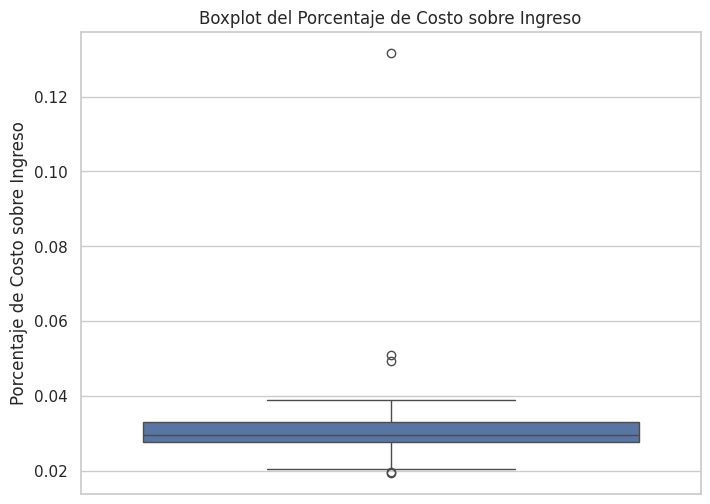

In [227]:
# ------------------------------------------------------------------------------
# 8.11) Boxplot para identificar la Dispersion del Porcentaje de Costo sobre el Ingreso.
# ------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

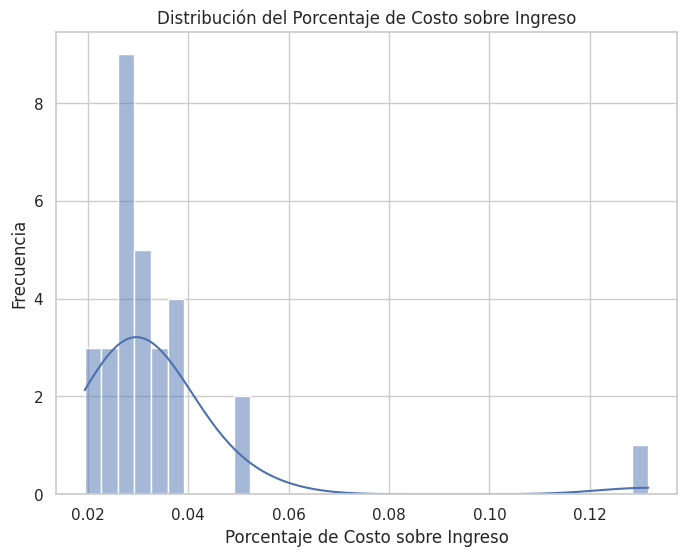

In [228]:
# ------------------------------------------------------------------------------
# 8.12) Histograma para ver la Distribución del Porcentaje de Costo sobre Ingreso.
# ------------------------------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

## 🔍 **ETAPA 3:** Análisis de Datos
**Objetivos:**
- Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

**Procedimiento de Limpieza del dataset:**
- Eliminar duplicados.
- Normalizar **texto** en columnas `object` (trim + capitalización simple).
- Convertir fechas a fechas reales
- Convertir `precio` y `cantidad` a numéricos si existen.
- Guardar CSV limpios.

<br>----------------------------------------------------------------------------

### 9️⃣ Estadística Descriptiva

- Calcular medidas de tendencia central y dispersión sobre las ventas.
- Presentar los resultados en un informe.

<br>----------------------------------------------------------------------------


####**9.1.** Gráfico de resumen por producto.

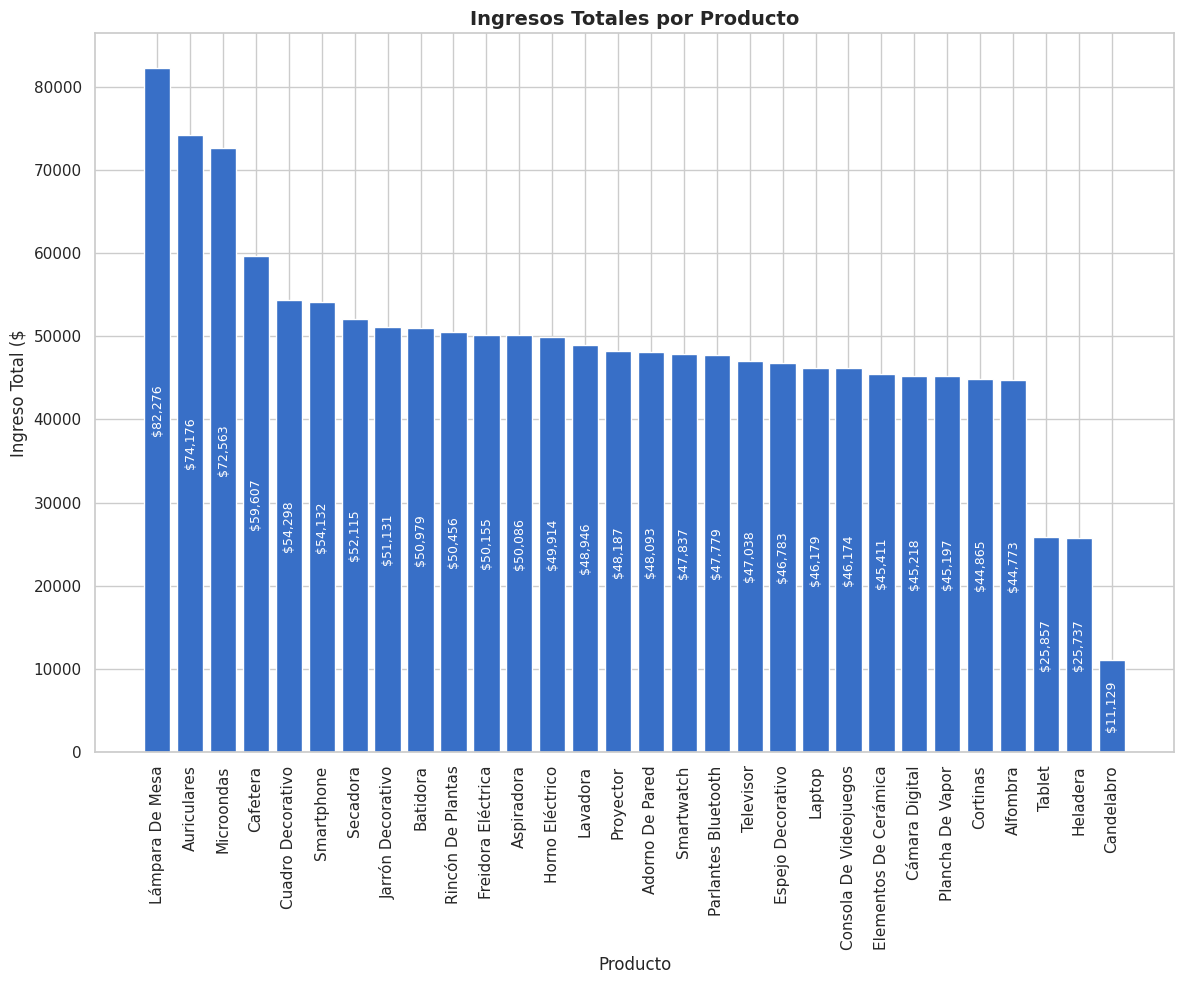

In [229]:
# ==============================================================================
# 9.1) 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# ==============================================================================

# el df que obtuvimos arriba resumen_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico

#df = ventas_top.copy()
df = resumen_prod.copy()
#df = resumen_cant.copy()

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#386FC7"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado.index, df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($")  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()


####**9.2.** Gráfico de resumen por categoria.

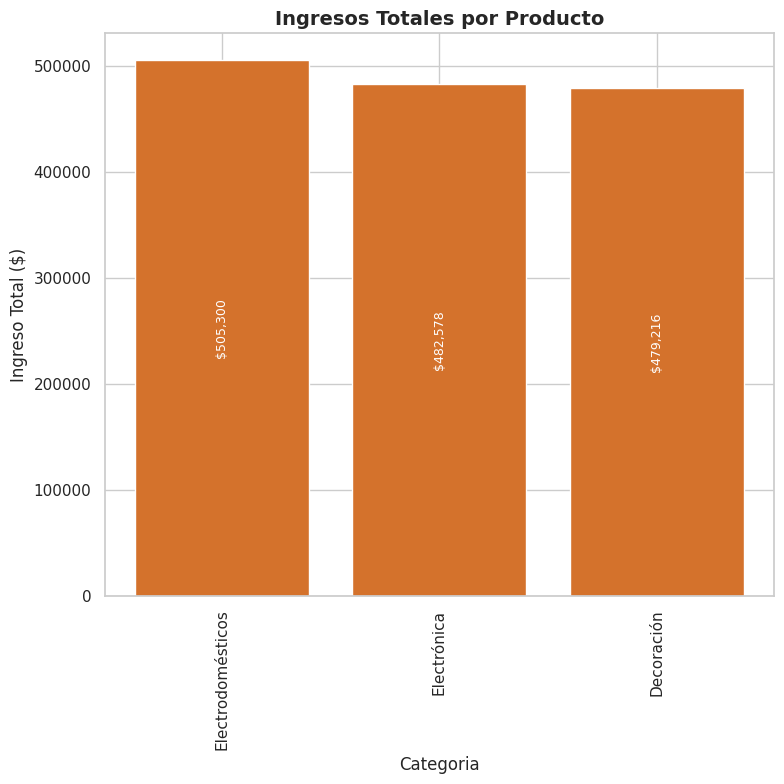

In [230]:
# ==============================================================================
# 9.2) 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# ==============================================================================

# el df que obtuvimos arriba resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df = resumen_cat.copy()


# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_celeste = "#D4722C"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()


####**9.3.** Medidas de tendencia central del Subtotal.


Estas medidas describen el valor típico de las ventas:

- Media: promedio general.
- Mediana: valor central de los datos ordenados.
- Moda: valor que más se repite.

In [231]:

# ==============================================================================
# 9.3) Calculo de Medidas de tendencia central del Subtotal.
# ==============================================================================

media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("="*80)
print(f"=== CALCULO DE MEDIDAS DE TENDENCIAS ===".center(80, "="))
print("="*80)
print("\n")

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)
print("\n")


======================= CALCULO DE MEDIDAS DE TENDENCIAS =======================


Media: 489031.17333333334
Mediana: 482577.8
Moda:
0    479216.09
1     482577.8
2    505299.63
Name: ingreso_total, dtype: Float64




####**9.4.** Medidas de dispersión.

Miden cuánto se alejan los valores entre sí:

- Rango = Máximo − Mínimo
- Varianza = Promedio de las desviaciones cuadradas
- Desviación estándar = Raíz cuadrada de la varianza

 📈 Interpretación:

- Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

 ¿Qué es la desviación estándar?

- La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media).
- Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.

In [232]:

# ==============================================================================
# 9.4) Medidas de dispersión.
# ==============================================================================

rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("="*80)
print(f"=== CALCULOS SOBRE LOS INGRESOS TOTALES ===".center(80, "="))
print("="*80)
print("\n")

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)
print("\n")
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Min Ingreso Total: {df['ingreso_total'].min():,.2f}")
print(f"Max Ingreso Total: {df['ingreso_total'].max():,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")
print("\n")


===================== CALCULOS SOBRE LOS INGRESOS TOTALES ======================


Rango: 26083.53999999998
Varianza: 201322285.26743323
Desviación estándar: 14188.808451291223


Media de Ingreso Total: 489,031.17
Mediana de Ingreso Total: 482,577.80
Desviación Estándar de Ingreso Total: 14,188.81
Min Ingreso Total: 479,216.09
Max Ingreso Total: 505,299.63
Rango de Ingreso Total: 26,083.54




####**9.5.** Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**

- Media (Promedio): 489,031.17
- Mediana: 482,577.80
- Desviación Estándar: 14,188.81
- Rango: 26,083.54 (Máximo: 505,299.63 - Mínimo: 479,216.09)

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio= 489,031.17 y la mediana= 482,577.80 son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar de 14,188.81 indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media de $489,031.17, esta desviación no es considerable (aproximadamente un 3% de la media).

3.  **Rango:**
    
    El rango de 26,083.54, que va desde el producto con menores ingresos (479,216.09) hasta el de mayores ingresos (505,299.63), confirma una moderada variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **desviación estándar** y el **rango** de los ingresos totales por producto revelan una **variabilidad moderada**. Lo que implica que no es alta, pero si considerable para hacerle un seguimiento de cerca ante un posible disparo.

  Esto significa que, aunque la mayoria de los productos generan un ingreso "practicamente" similar, no es uniforme.

  Existen una diferencia a tener en cuenta entre los productos del extremo superior e inferior.

  Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas.
  
  La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían de manera moderada del ingreso promedio general.


####**9.6.** TAREA

Calcular la Desviacion Estandar, el Rango de Cantidades y el Precio Promedio del mismo dataset resumen_prod = df


####**9.7.** Cálculo del rango intercuartílico (IQR)

El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:

El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

<br>----------------------------------------------------------------------------

In [233]:
# ==============================================================================
# 9.7) Cálculo del rango intercuartílico (IQR).
# ==============================================================================

q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("="*80)
print(f"=== RANGO INTERCUARLITICO (IQR) ===".center(80, "="))
print("="*80)
print("\n")

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)
print("\n")


========================= RANGO INTERCUARLITICO (IQR) ==========================


Q1: 480896.945
Mediana (Q2): 482577.8
Q3: 493938.71499999997
IQR: 13041.76999999996




####**9.8.** Detección de outliers usando el IQR

Regla general:

- Límite inferior = Q1 − (1.5 × IQR)

- Límite superior = Q3 + (1.5 × IQR)

<br>----------------------------------------------------------------------------

In [234]:
# ==============================================================================
# 9.8) Detección de outliers usando el IQR.
# ==============================================================================

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("="*80)
print(f"=== LIMITES Y OUTLIERS ===".center(80, "="))
print("="*80)
print("\n")

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)
print("\n")


============================== LIMITES Y OUTLIERS ==============================


Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio, ticket_promedio_por_venta]
Index: []




### 🔟 Análisis Exploratorio de Datos (EDA) (Con visualizaciones)

- Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

- Buscamos patrones y tendencias en las ventas usando visualizaciones simples.

- A continuación se muestran un histograma (distribución) y un boxplot (dispersión/outliers) sobre los ingresos por producto ya calculados en etapas previas.

<br>----------------------------------------------------------------------------

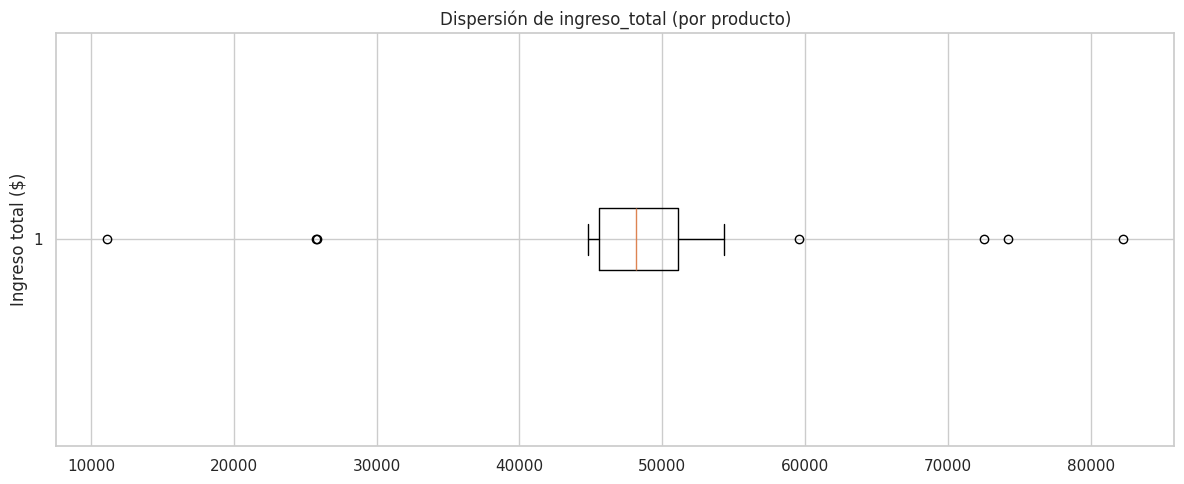

In [235]:
# ==============================================================================
# 10.1) 📦 Boxplot: Dispersión de ingreso_total (por producto).
# ==============================================================================

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico


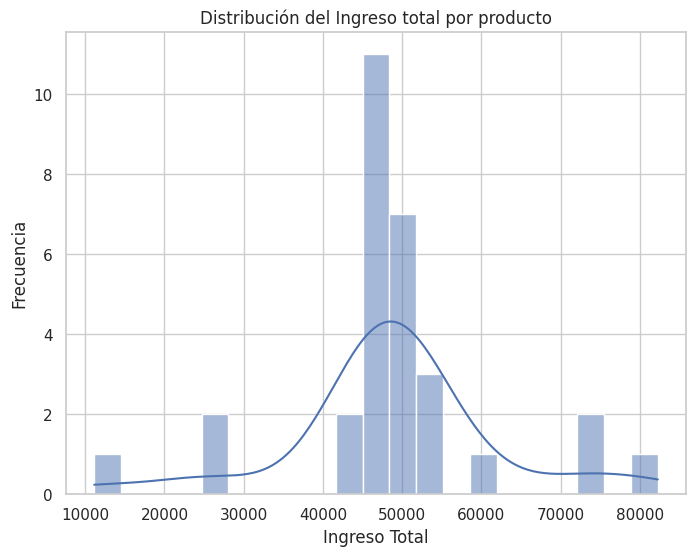

In [236]:
# ------------------------------------------------------------------------------
# 10.2) Histograma: Distribución de ingreso_total (por producto).
# ------------------------------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()


### 1️⃣1️⃣ Correlación

- Evaluamos la relación entre precio_promedio y unidades por producto.

- Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva.

- También mostramos el coeficiente de correlación.

<br>----------------------------------------------------------------------------

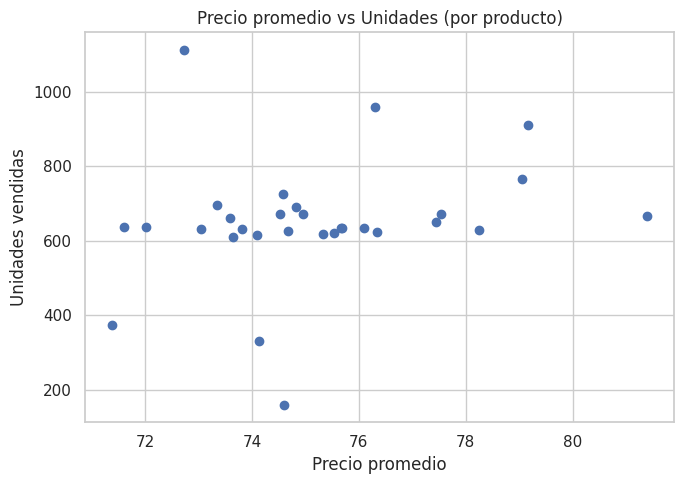

In [237]:
# ==============================================================================
# 11.1) 🔵 Dispersión: precio_promedio vs unidades (por producto).
# ==============================================================================

import matplotlib.pyplot as plt  # importamos matplotlib

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [238]:
# No hay una función para trazar la curva de correlación?

# ==============================================================================
# 11.2) 📌 Coeficiente de correlación (precio_promedio vs unidades).
# ==============================================================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print("="*80)
print(f"=== COEF. CORRELACION (Precio Promedio vs Unidades) ===".center(80, "="))
print("="*80)
print("\n")

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

print("\n")


=============== COEF. CORRELACION (Precio Promedio vs Unidades) ================


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.




## 📊 **ETAPA 4:** Visualización de Datos
**Objetivos:**
- Se utilizaran graficos para visualizar los datos y poder sacar conclusiones para la toma de decisiones.

**Procedimiento de Limpieza del dataset:**
- Eliminar duplicados.
- Normalizar **texto** en columnas `object` (trim + capitalización simple).
- Convertir fechas a fechas reales
- Convertir `precio` y `cantidad` a numéricos si existen.
- Guardar CSV limpios.

<br>----------------------------------------------------------------------------

### 1️⃣2️⃣ Visualización con Matplotlib (básica)

- Gráficos de **líneas, barras y dispersión** comentados línea por línea.

<br>----------------------------------------------------------------------------

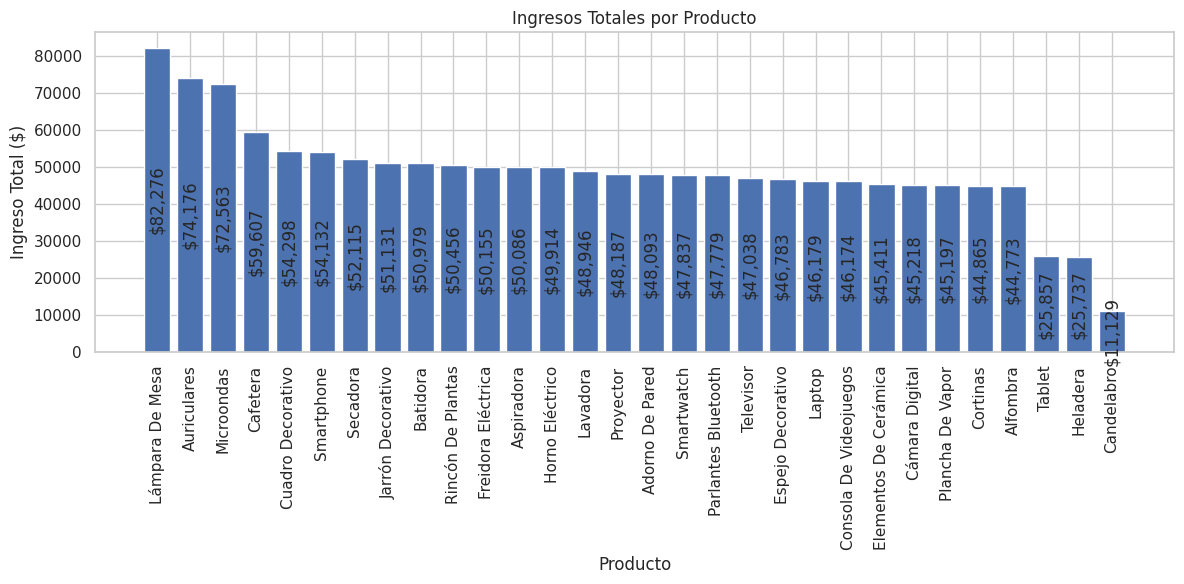

In [239]:
# ==============================================================================
# 12.1) 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# ==============================================================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado.index, df_ordenado['ingreso_total'])  # dibujamos las barras, usando el índice para los productos

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


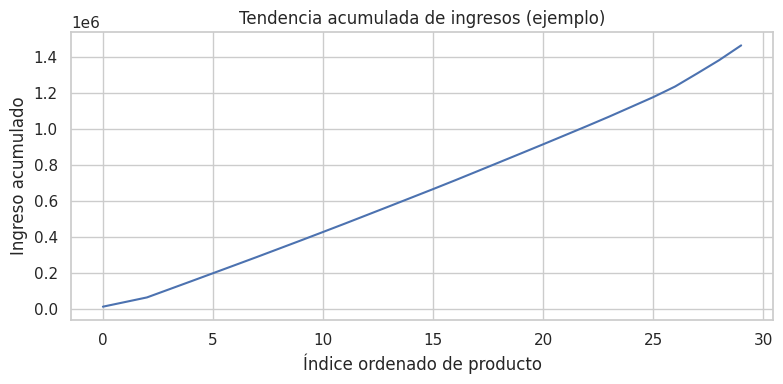

In [240]:
# ==============================================================================
# 12.2) 📉 Líneas: ejemplo simple de tendencia acumulada
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


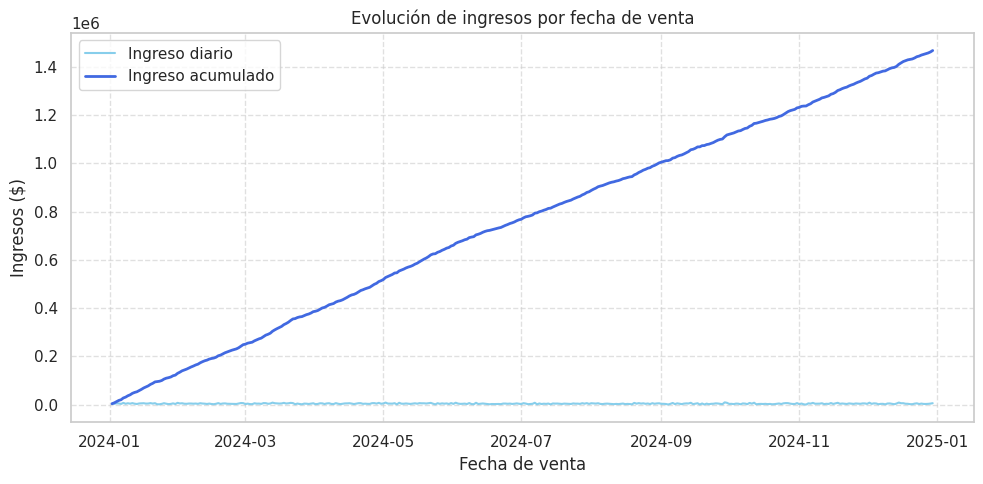

In [241]:
# ==============================================================================
# 12.3) 📉 Tendencia real de ingresos a lo largo del tiempo.
# ==============================================================================

# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10, 5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).


### 1️⃣3️⃣ Visualización Avanzada con Seaborn

- Seaborn ofrece estilos y elementos estadísticos que mejoran la presentación.

<br>----------------------------------------------------------------------------

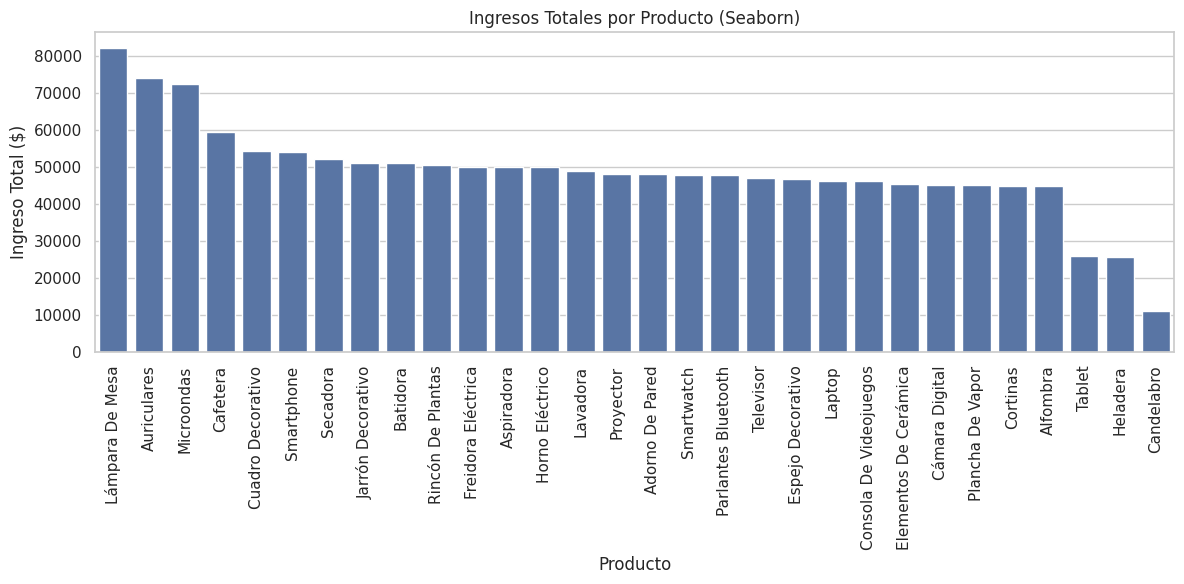

In [242]:
# ==============================================================================
# 13.1) 🌈 Seaborn: Barras ordenadas y boxplot por categoría.
# ==============================================================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)

df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


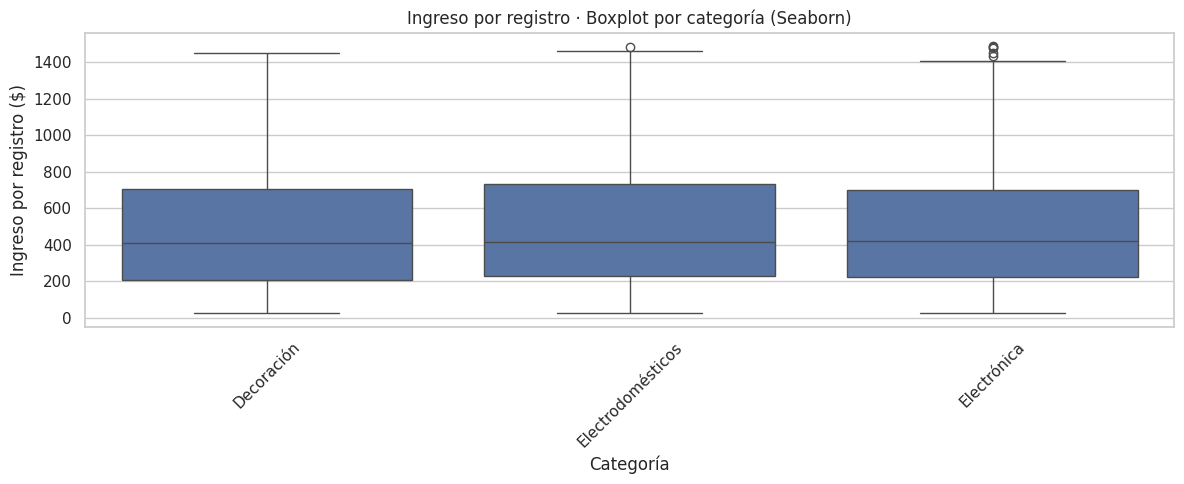

In [243]:
# ------------------------------------------------------------------------------
# 13.2) Boxplot por categoría (ingreso por registro)
# ------------------------------------------------------------------------------

plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


### 1️⃣4️⃣ Presentación Final (Informe)

Informe breve que resume:
- Conclusiones Integrales del Proyecto.
- Explicacion de las etapas del Proyecto Integrador.
- Síntesis conceptual y didáctica.
- **Productos líderes** y **categorías destacadas**.
- Diferencia **media vs. mediana** y su interpretación en estos datos.
- Presencia de **outliers** y su impacto.
- Recomendaciones sobre **qué productos potenciar** y **eficiencia de marketing**.
- Cierre general.

<br>----------------------------------------------------------------------------

### 📘 Conclusiones Integrales del Proyecto

Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo cómo la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### 🧾 ETAPA 1 y 2: Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  
- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  
- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### 📊 ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### 🔹 Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$51.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  
- **Mediana del ingreso_total:** ≈ \$48.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  
- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.  
- **Desviación estándar:** alrededor de \$10.000  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  
- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### 🔍 EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  
- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.  
- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### 🔗 Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> 📈 **r ≈ +0.28**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  
> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### 🎨 ETAPA 4: Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### 🧠 Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

#### 💡 Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.  
2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  
3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.  
4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  
5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

✅ **Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.


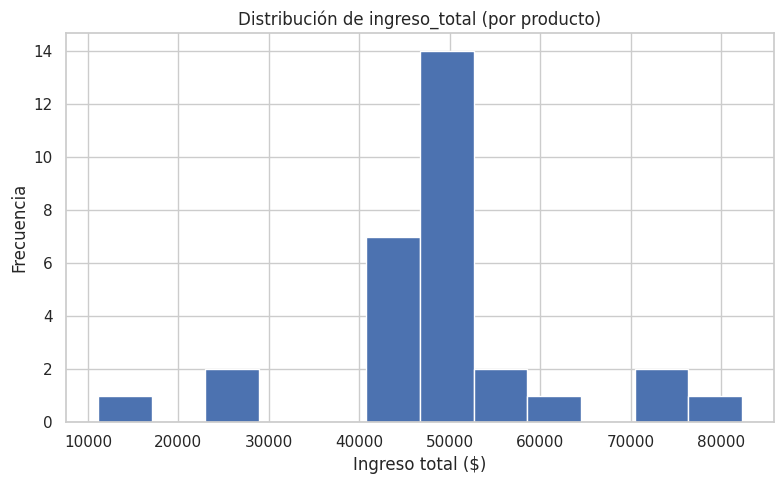

In [244]:
# ==============================================================================
# 14.1) 📈 Histograma: Distribución de ingreso_total (por producto).
# ==============================================================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico
